In [103]:

import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np
import seaborn as sns

import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

from sklearn import metrics,tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [47]:
df_spotify=pd.read_csv("./data/spotify_after.csv")

In [48]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 37 columns):
Title                         512 non-null object
Artist                        512 non-null object
id                            512 non-null object
artist_genres                 512 non-null object
is_single                     512 non-null int64
total_tracks                  512 non-null int64
release_date                  512 non-null object
day_of_week                   512 non-null int64
release_season                512 non-null int64
Year                          512 non-null int64
is_top100                     512 non-null int64
acousticness                  512 non-null float64
danceability                  512 non-null float64
duration_ms                   512 non-null int64
energy                        512 non-null float64
instrumentalness              512 non-null float64
key                           512 non-null int64
liveness                      512 non-null float6

## Change the song duration from ms to minutes

In [49]:
df_spotify['duration_ms'] = round(df_spotify['duration_ms'] / 60000 , 2)
df_spotify.rename(columns={"duration_ms": "duration_min"}, inplace=True)
df_spotify.head(10)

,Title,Artist,id,artist_genres,is_single,total_tracks,release_date,day_of_week,release_season,Year,...,words_neg_count,words_pos_count,words_curse_count,avg_most_common_words_size,words_repeat_count,words_negative_pct,words_positive_pct,words_curse_pct,words_repeat_pct,stopwords_pct
0,Love Yourself,Justin Bieber,3hB5DgAiMAQ4DzYbsMq1IT,"['canadian pop', 'pop', 'post-teen pop']",1,19,2015-11-13,5,3,2015,...,648,350,0,5.08,179,31.50,17.02,0.00,8.70,7.78
1,Sorry,Justin Bieber,69bp2EbF7Q2rqc5N3ylezZ,"['canadian pop', 'pop', 'post-teen pop']",1,19,2015-11-13,5,3,2015,...,1104,600,0,5.34,117,74.65,40.57,0.00,7.91,8.25
2,One Dance,Drake,1xznGGDReH1oQq0xzbwXa3,"['canadian hip hop', 'canadian pop', 'hip hop'...",1,20,2016-05-06,5,1,2016,...,384,525,0,4.98,184,21.66,29.61,0.00,10.38,7.28
3,Work,Rihanna,14WWzenpaEgQZlqPq2nk4v,"['barbadian pop', 'dance pop', 'pop', 'post-te...",1,16,2016-01-28,4,4,2016,...,816,450,1,5.36,307,30.18,16.64,0.04,11.35,4.77
4,Stressed Out,Twenty One Pilots,3CRDbSIZ4r5MsZ0YwxuEkn,"['modern rock', 'rock']",1,14,2015-05-15,5,1,2015,...,336,525,0,5.29,265,13.47,21.05,0.00,10.63,7.38
5,Panda,Desiigner,5OOkp4U9P9oL23maHFHL1h,"['pop rap', 'rap', 'southern hip hop', 'trap',...",1,14,2016-06-26,7,2,2016,...,600,200,24,5.42,362,18.30,6.10,0.73,11.04,4.79
6,Hello,Adele,0ENSn4fwAbCGeFGVUbXEU3,"['british soul', 'pop', 'uk pop']",0,1,2015-10-23,5,3,2015,...,312,200,9,5.51,142,19.60,12.56,0.57,8.92,7.29
7,Dont Let Me Down,The Chainsmokers,1i1fxkWeaMmKEB4T7zqbzK,"['electropop', 'pop', 'tropical house']",0,1,2016-02-05,5,4,2016,...,288,400,0,5.27,150,18.37,25.51,0.00,9.57,7.40
8,CANT STOP THE FEELING,Justin Timberlake,6JV2JOEocMgcZxYSZelKcc,"['dance pop', 'pop']",0,1,2016-05-06,5,1,2016,...,480,850,0,5.42,252,18.91,33.49,0.00,9.93,6.70
9,Closer,The Chainsmokers,7BKLCZ1jbUBVqRi2FVlTVw,"['electropop', 'pop', 'tropical house']",0,1,2016-07-29,5,2,2016,...,840,425,0,5.03,196,47.46,24.01,0.00,11.07,5.42


In [50]:
lst=df_spotify['artist_genres'].values

genres=[]
j=0
for i in lst:
    ls=i.split(',')
    if len(ls)>1:
        genres.append(ls[1].replace(" '","").replace("]","").replace("[","").replace("'",""))
    else:
        genres.append(ls[0].replace(" '","").replace("]","").replace("[","").replace("'",""))
    if genres[j]=='':
        genres[j]=pd.np.NaN
    j+=1

In [51]:
df_spotify['Genres']=genres
df_spotify.tail()

,Title,Artist,id,artist_genres,is_single,total_tracks,release_date,day_of_week,release_season,Year,...,words_pos_count,words_curse_count,avg_most_common_words_size,words_repeat_count,words_negative_pct,words_positive_pct,words_curse_pct,words_repeat_pct,stopwords_pct,Genres
507,Myself,Bazzi,5YLHLxoZsodDWjqSgjhBf3,"['pop', 'post-teen pop']",1,16,2018-04-12,4,1,2018,...,250,3,5.46,124,11.70,20.31,0.24,10.07,5.28,post-teen pop
508,Lost In Japan,Shawn Mendes,79esEXlqqmq0GPz0xQSZTV,"['canadian pop', 'dance pop', 'pop', 'post-tee...",1,14,2018-05-25,5,1,2018,...,300,0,5.49,168,3.81,15.88,0.00,8.89,6.99,dance pop
509,Faucet Failure,Ski Mask The Slump God,1ThmUihH9dF8EV08ku5AXN,"['miami hip hop', 'rap', 'trap', 'underground ...",1,13,2018-11-30,5,3,2018,...,450,24,5.50,204,6.04,22.66,1.21,10.27,5.89,rap
510,SLOW DANCING IN THE DARK,Joji,0rKtyWc8bvkriBthvHKY8d,"['alternative r&b', 'viral pop']",1,12,2018-10-26,5,3,2018,...,350,2,4.91,108,4.27,31.11,0.18,9.60,7.64,viral pop
511,Look Back at It,A Boogie Wit da Hoodie,3Ol2xnObFdKV9pmRD2t9x8,"['melodic rap', 'pop rap', 'rap', 'trap']",1,20,2018-12-21,5,4,2018,...,525,5,5.61,157,19.98,29.13,0.28,8.71,6.49,pop rap


In [52]:
df_spotify=df_spotify.dropna()
len(df_spotify)

507

In [53]:
df_spotify.groupby(['Genres']).mean()

,is_single,total_tracks,day_of_week,release_season,Year,is_top100,acousticness,danceability,duration_min,energy,...,words_neg_count,words_pos_count,words_curse_count,avg_most_common_words_size,words_repeat_count,words_negative_pct,words_positive_pct,words_curse_pct,words_repeat_pct,stopwords_pct
Genres,,,,,,,,,,,,,,,,,,,,,
"""childrens music""",1.000000,20.0,4.000000,2.000000,2017.000000,0.000000,0.259000,0.829000,1.350000,0.886000,...,0.000000,100.000000,0.000000,4.820000,60.000000,0.000000,9.190000,0.000000,5.510,0.740000
acoustic pop,0.000000,1.0,5.000000,4.000000,2017.000000,0.000000,0.469000,0.618000,3.310000,0.443000,...,576.000000,225.000000,0.000000,5.230000,116.000000,51.520000,20.130000,0.000000,10.380,6.350000
atl hip hop,1.000000,14.0,5.000000,3.000000,2016.000000,0.000000,0.030700,0.417000,4.110000,0.580000,...,528.000000,300.000000,33.000000,4.880000,252.000000,18.570000,10.550000,1.160000,8.860,8.860000
atl trap,0.800000,11.8,4.800000,2.000000,2017.200000,0.400000,0.073344,0.832000,3.308000,0.599400,...,537.600000,515.000000,14.400000,5.304000,241.800000,21.426000,18.940000,0.566000,9.444,7.200000
australian electropop,1.000000,16.0,5.000000,1.000000,2016.000000,1.000000,0.441000,0.443000,3.890000,0.558000,...,552.000000,325.000000,16.000000,5.380000,179.000000,31.830000,18.740000,0.920000,10.320,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uk pop,0.571429,10.0,4.857143,2.142857,2017.142857,0.571429,0.386957,0.622429,3.698571,0.607429,...,353.142857,335.714286,0.571429,5.324286,177.857143,22.301429,21.208571,0.038571,8.920,8.075714
video game music,0.000000,1.0,5.000000,3.000000,2017.000000,0.000000,0.007860,0.498000,3.920000,0.598000,...,528.000000,125.000000,0.000000,5.650000,145.000000,35.600000,8.430000,0.000000,9.780,6.740000
viral pop,1.000000,12.0,5.000000,3.000000,2018.000000,0.000000,0.544000,0.515000,3.490000,0.479000,...,48.000000,350.000000,2.000000,4.910000,108.000000,4.270000,31.110000,0.180000,9.600,7.640000


In [54]:
df_spotify.sort_values(by='words_curse_count')

,Title,Artist,id,artist_genres,is_single,total_tracks,release_date,day_of_week,release_season,Year,...,words_pos_count,words_curse_count,avg_most_common_words_size,words_repeat_count,words_negative_pct,words_positive_pct,words_curse_pct,words_repeat_pct,stopwords_pct,Genres
0,Love Yourself,Justin Bieber,3hB5DgAiMAQ4DzYbsMq1IT,"['canadian pop', 'pop', 'post-teen pop']",1,19,2015-11-13,5,3,2015,...,350,0,5.08,179,31.50,17.02,0.00,8.70,7.78,pop
310,Ophelia,The Lumineers,5NORWMFC27ywGSZxi8uquP,"['folk-pop', 'modern rock', 'stomp and holler']",1,11,2016-04-08,5,1,2016,...,50,0,5.24,86,21.08,6.27,0.00,10.79,5.52,modern rock
308,Can I Be Him,James Arthur,5ZMCXFJe9EyL9TM6PrA56U,"['pop', 'post-teen pop', 'talent show', 'uk pop']",1,18,2016-10-28,5,3,2016,...,450,0,4.92,109,22.67,30.36,0.00,7.35,9.65,post-teen pop
304,Alone,Marshmello,3MEYFivt6bilQ9q9mFWZ4g,"['brostep', 'pop', 'progressive electro house']",0,1,2016-05-13,5,1,2016,...,250,0,4.88,50,42.67,55.56,0.00,11.11,6.22,pop
301,Nevermind,Dennis Lloyd,3PHjgrovCBjQQl5Np5YQBy,['israeli pop'],0,1,2016-09-18,7,3,2016,...,250,0,4.88,48,54.96,47.71,0.00,9.16,5.92,israeli pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,GUMMO,6ix9ine,4HbiCvH1R7mVOJ7KY7JQBD,"['emo rap', 'rap', 'trap']",1,12,2018-04-10,2,1,2018,...,100,46,5.04,183,22.69,5.25,2.42,9.61,7.51,rap
103,Bad Boujee,Migos,1FvU97lrWOG2NRxErh6OZz,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",0,1,2016-10-28,5,3,2016,...,700,50,5.25,552,34.81,12.38,0.88,9.76,6.85,hip hop
101,HUMBLE,Kendrick Lamar,7ujx3NYtwO2LkmKGz59mXp,"['conscious hip hop', 'hip hop', 'rap', 'west ...",1,14,2017-04-14,5,1,2017,...,475,51,5.45,215,14.91,17.35,1.86,7.86,7.34,hip hop
460,Mo Bamba,Sheck Wes,1xzBco0xcoJEDXktl7Jxrr,"['rap', 'trap', 'underground hip hop', 'vapor ...",1,14,2018-10-05,5,3,2018,...,300,52,5.48,169,4.50,18.76,3.25,10.57,5.07,trap


In [62]:
top100 = df_spotify[df_spotify['is_top100'] == 1]
not_top100 = df_spotify[df_spotify['is_top100'] == 0]

In [63]:
top100.describe()

,is_single,total_tracks,day_of_week,release_season,Year,is_top100,acousticness,danceability,duration_min,energy,...,words_neg_count,words_pos_count,words_curse_count,avg_most_common_words_size,words_repeat_count,words_negative_pct,words_positive_pct,words_curse_pct,words_repeat_pct,stopwords_pct
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.0,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.673611,10.774306,4.559028,2.326389,2016.645833,1.0,0.166151,0.696247,3.665937,0.630561,...,510.416667,448.090278,6.034722,5.323437,204.048611,24.665694,21.517153,0.248403,9.490451,6.820556
std,0.469708,7.367016,1.037614,1.137452,0.973293,0.0,0.192014,0.134976,0.602843,0.146973,...,369.283542,328.794915,10.120468,0.267404,80.470379,16.703620,14.231665,0.390762,1.117749,1.532920
min,0.000000,1.000000,1.000000,1.000000,2015.000000,1.0,0.000243,0.333000,2.030000,0.056500,...,0.000000,0.000000,0.000000,4.680000,30.000000,0.000000,0.000000,0.000000,4.970000,1.180000
25%,0.000000,1.000000,5.000000,1.000000,2016.000000,1.0,0.029025,0.611750,3.337500,0.533750,...,264.000000,243.750000,0.000000,5.150000,150.000000,13.327500,11.740000,0.000000,8.810000,6.157500
50%,1.000000,13.000000,5.000000,2.000000,2017.000000,1.0,0.087800,0.700500,3.620000,0.640500,...,432.000000,387.500000,1.000000,5.310000,187.000000,20.875000,19.605000,0.060000,9.490000,6.880000
75%,1.000000,16.000000,5.000000,3.000000,2017.000000,1.0,0.222750,0.791750,3.930000,0.743000,...,648.000000,575.000000,8.000000,5.500000,243.500000,31.882500,26.825000,0.340000,10.195000,7.895000
max,1.000000,28.000000,7.000000,4.000000,2018.000000,1.0,0.965000,0.964000,6.970000,0.928000,...,2976.000000,2450.000000,70.000000,6.290000,552.000000,110.610000,85.570000,2.420000,12.770000,10.730000


In [57]:
not_top100.describe()

,is_single,total_tracks,day_of_week,release_season,Year,is_top100,acousticness,danceability,duration_min,energy,...,words_neg_count,words_pos_count,words_curse_count,avg_most_common_words_size,words_repeat_count,words_negative_pct,words_positive_pct,words_curse_pct,words_repeat_pct,stopwords_pct
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.639269,10.054795,4.794521,2.456621,2016.986301,0.0,0.291632,0.648096,3.472420,0.598646,...,448.438356,385.159817,4.461187,5.302740,168.095890,26.399726,22.848128,0.205342,9.539817,6.690639
std,0.481313,7.610755,0.908051,1.032361,0.848525,0.0,0.271774,0.136638,0.878194,0.179440,...,317.428818,283.535343,8.623209,0.277811,77.758653,16.831269,15.580450,0.384485,1.157183,1.617588
min,0.000000,1.000000,1.000000,1.000000,2016.000000,0.0,0.000450,0.278000,1.350000,0.048500,...,0.000000,0.000000,0.000000,4.350000,21.000000,0.000000,0.000000,0.000000,3.660000,0.470000
25%,0.000000,1.000000,5.000000,2.000000,2016.000000,0.0,0.067100,0.560000,3.015000,0.496000,...,216.000000,200.000000,0.000000,5.140000,110.500000,13.855000,12.030000,0.000000,8.965000,5.870000
50%,1.000000,11.000000,5.000000,2.000000,2017.000000,0.0,0.194000,0.667000,3.360000,0.609000,...,408.000000,325.000000,0.000000,5.290000,154.000000,22.670000,19.830000,0.000000,9.560000,6.700000
75%,1.000000,15.000000,5.000000,3.000000,2018.000000,0.0,0.463500,0.746000,3.695000,0.728000,...,624.000000,512.500000,5.000000,5.490000,210.500000,37.570000,29.220000,0.275000,10.295000,7.595000
max,1.000000,59.000000,7.000000,4.000000,2018.000000,0.0,0.947000,0.935000,9.960000,0.953000,...,2064.000000,1500.000000,52.000000,6.120000,565.000000,101.530000,87.920000,3.250000,12.420000,11.320000


In [58]:
top100_by_year=top100.groupby(['Year'])

In [59]:
top100_by_year=top100_by_year[['duration_min','words_count', 'stopwords_count', 'words_neg_count', 'words_pos_count', 'words_curse_count', 'words_repeat_count']].mean()
top100_by_year

,duration_min,words_count,stopwords_count,words_neg_count,words_pos_count,words_curse_count,words_repeat_count
Year,,,,,,,
2015,3.737949,1843.538462,131.615385,550.769231,437.179487,2.948718,172.025641
2016,3.751818,2110.431818,139.375000,561.000000,471.022727,5.204545,202.272727
2017,3.631649,2134.082474,150.515464,475.298969,453.865979,7.103093,201.628866
2018,3.555938,2365.078125,152.531250,469.500000,414.453125,7.437500,229.671875


[]

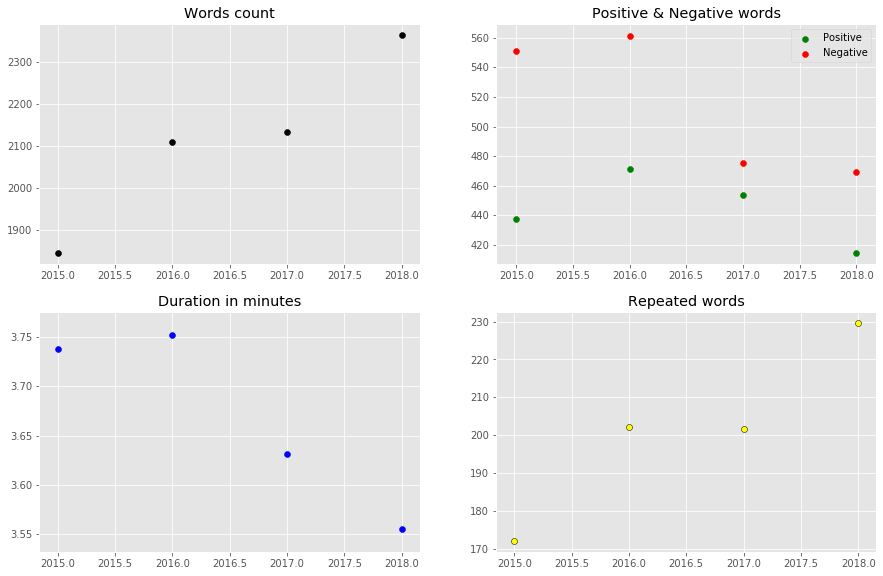

In [61]:
plt.figure(figsize=(15, 15))

plt.subplot(321)
plt.title('Words count')
plt.scatter(top100_by_year.index, top100_by_year['words_count'] ,color='black', label="data", linewidths=0.5, edgecolors='black');
plt.plot()


plt.subplot(322)

plt.title('Positive & Negative words')
plt.scatter(top100_by_year.index, top100_by_year['words_pos_count'] ,color='green', label="data");
plt.scatter(top100_by_year.index, top100_by_year['words_neg_count'] ,color='red', label="data");
plt.legend(('Positive', 'Negative'))
plt.plot()

plt.subplot(323)

plt.title('Duration in minutes')
plt.scatter(top100_by_year.index, top100_by_year['duration_min'] ,color='blue', label="data");
plt.plot()

plt.subplot(324)
plt.title('Repeated words')
plt.scatter(top100_by_year.index, top100_by_year['words_repeat_count'] ,color='yellow', label="data", linewidths=0.5, edgecolors='black');
plt.plot()

In [93]:
df_spotify_by_year=df_spotify.groupby(['release_season'])

In [94]:
df_spotify_by_year=df_spotify_by_year[['is_top100']].mean()
df_spotify_by_year

,is_top100
release_season,
1,0.654676
2,0.539568
3,0.472000
4,0.605769


[]

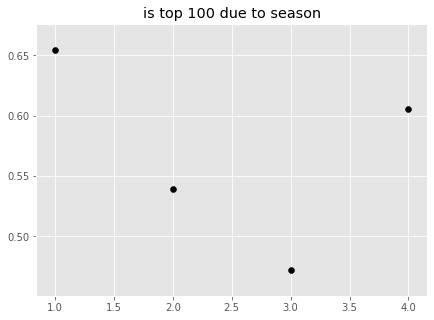

In [101]:
plt.figure(figsize=(7, 5))


plt.title('is top 100 due to season')
plt.scatter(df_spotify_by_year.index,df_spotify_by_year['is_top100'] ,color='black', label="data", linewidths=0.5, edgecolors='black');
plt.plot()



array([ 0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87201873,
        0.87201873,  0.87201873,  0.87201873,  0.87201873,  0.87